<a href="https://colab.research.google.com/github/devvratin/bootstrapbydevvrat/blob/main/end_to_end_heart_disease_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting heart disease using machine learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

We're going to take the following approach:
1. Problem definition
2. DATA
3. Evaluation
4. Modelling
5. Experimentation

## 1. Problem Definition

In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. DATA
  * create data dictioniory
1. id (Unique id for each patient)
2. age (Age of the patient in years)
origin (place of study)
3. sex (Male/Female)
4. cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
5. trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
6. chol (serum cholesterol in mg/dl)
7. fbs (if fasting blood sugar > 120 mg/dl)
8. restecg (resting electrocardiographic results)
-- Values: [normal, stt abnormality, lv hypertrophy]
9. thalach: maximum heart rate achieved
10. exang: exercise-induced angina (True/ False)
11. oldpeak: ST depression induced by exercise relative to rest
12. slope: the slope of the peak exercise ST segment
13. ca: number of major vessels (0-3) colored by fluoroscopy
14. thal: [normal; fixed defect; reversible defect]
15. num: the predicted attribute

## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.


## 4. Features

This is where you'll get different information  about each of the features




## Preparing the tools

We're going to use pandas, matplotlib and NumPy for data analysis and manipuation.

In [1]:
# Regular EDA ( exploratery data analysis) and plotting libraries

import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

In [2]:

df = pd.read_csv("/content/drive/MyDrive/heart-disease-project/heart-disease.csv")
df.shape

(303, 14)

## DAta exploration (eda)
the goal here is to find out more about the data and become a subject matter export on the dataset you're working with.

1. What question are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's mising from the data and how do you deal with it ?
4. Where are the outliers and why should you care about them ?
5. How can you add, change or remove features to get more out of your data?


<Axes: xlabel='target'>

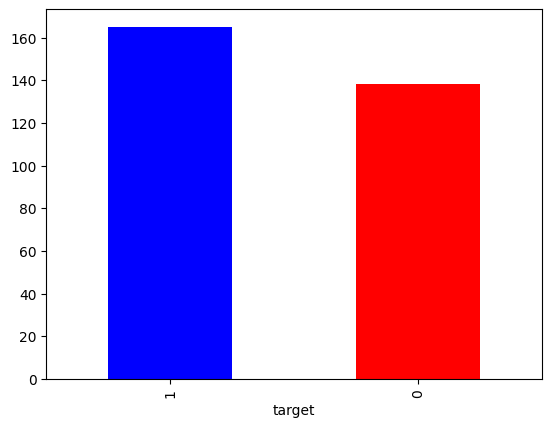

In [3]:
df.target.value_counts().plot(kind = "bar", color=["b",'r'])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**Heart Disease frequency acc to SEX**

In [6]:
df.sex.value_counts()

,count
sex,
1,207
0,96


In [7]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


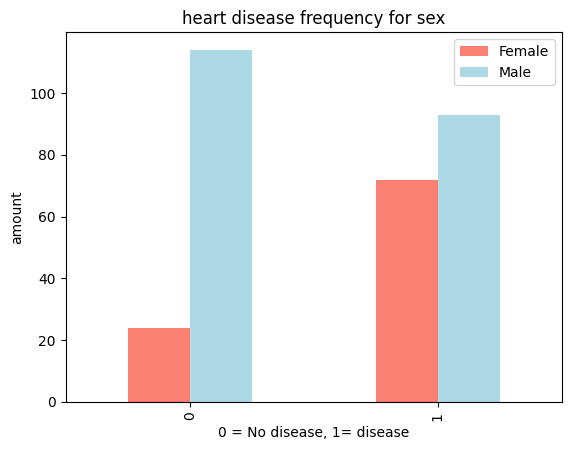

In [8]:
pd.crosstab(df.target, df.sex).plot(kind='bar', color= ['salmon','lightblue'])
plt.title("heart disease frequency for sex")
plt.xlabel("0 = No disease, 1= disease")
plt.ylabel("amount")
plt.legend(['Female','Male'])

In [9]:
# Max heart rate achive thalach

np.array(df['thalach'].value_counts())

array([11,  9,  9,  8,  8,  7,  7,  7,  7,  7,  7,  6,  6,  6,  6,  6,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1])

Age vs. Max heart rate for heart disease

In [10]:
df.age[df.target==1].value_counts().head()

,count
age,
54,10
41,9
52,9
51,9
44,8


Text(0.5, 1.0, 'heart dissease in function of age and max heart rate')

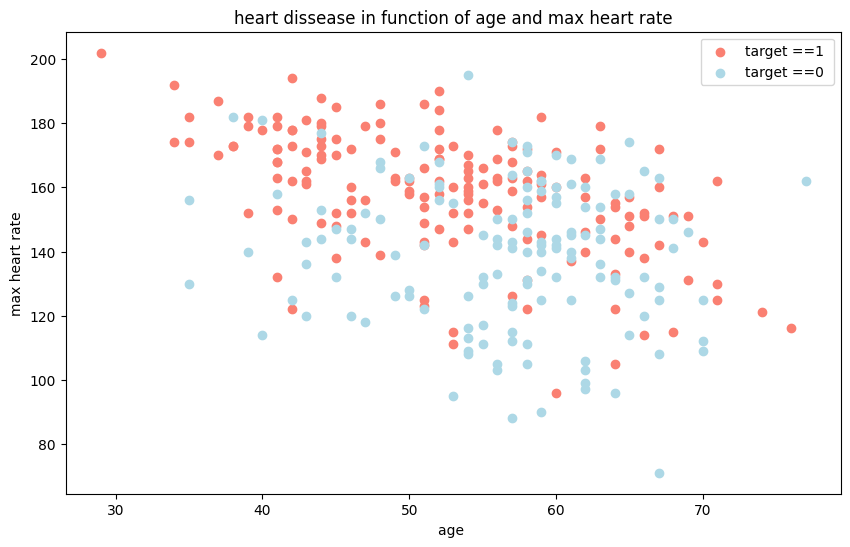

In [11]:
# Scatter with postivie examples
plt.figure(figsize= (10,6))
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c='salmon')
plt.xlabel("age with target 1")
plt.ylabel("thalach with target 1")

# Scatter with negative example
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c='lightblue')
plt.legend(["target ==1","target ==0 "])
plt.xlabel("age ")
plt.ylabel("max heart rate");

# Add osme helpful info
plt.title("heart dissease in function of age and max heart rate")

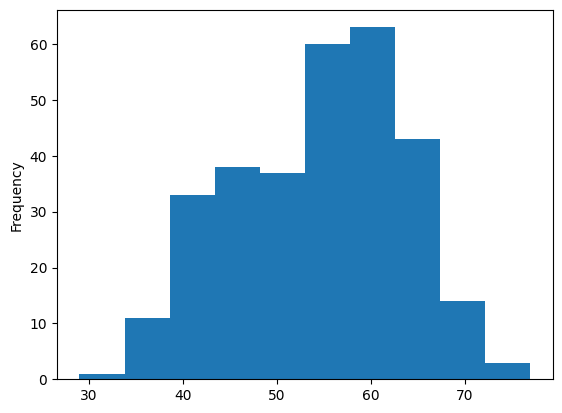

In [12]:
#check the distribution of the age column with a histogram
df.age.plot.hist();

### Heart disease Frequency per Chest Pain Type
cp chest pain type
* 0: Typical angina: chest pain related decrease blood supply to the heart
* 1: Atypical angina: chest pain not related to heart
* 2: Non-anginal pain : typically esophageal spasms (non heart related)
* 3: Asyptomatic: chest pain not showing signs of disease


In [13]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


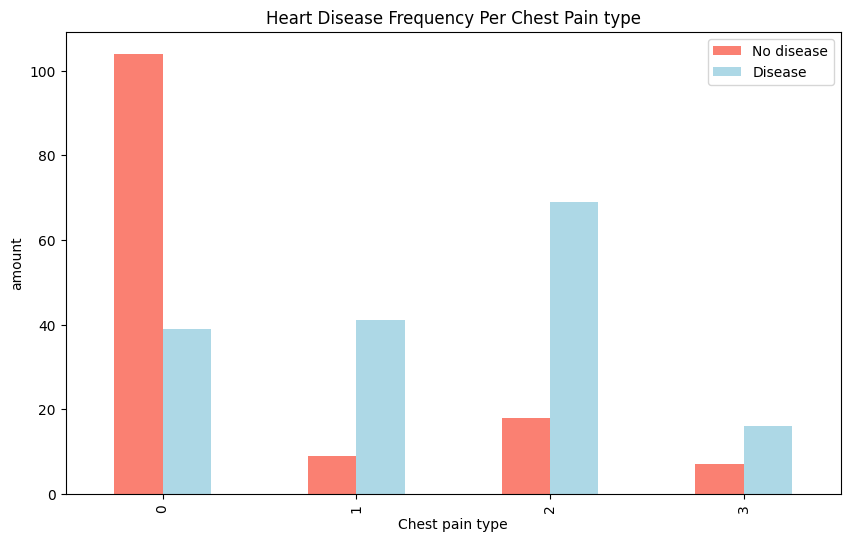

In [14]:
# make the crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind = 'bar',
                                   figsize=(10,6),
                                   color=['salmon','lightblue'])
# Add some communication
plt.title('Heart Disease Frequency Per Chest Pain type')
plt.xlabel('Chest pain type')
plt.ylabel('amount')
plt.legend(['No disease','Disease'])

In [15]:
# Building a corelation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


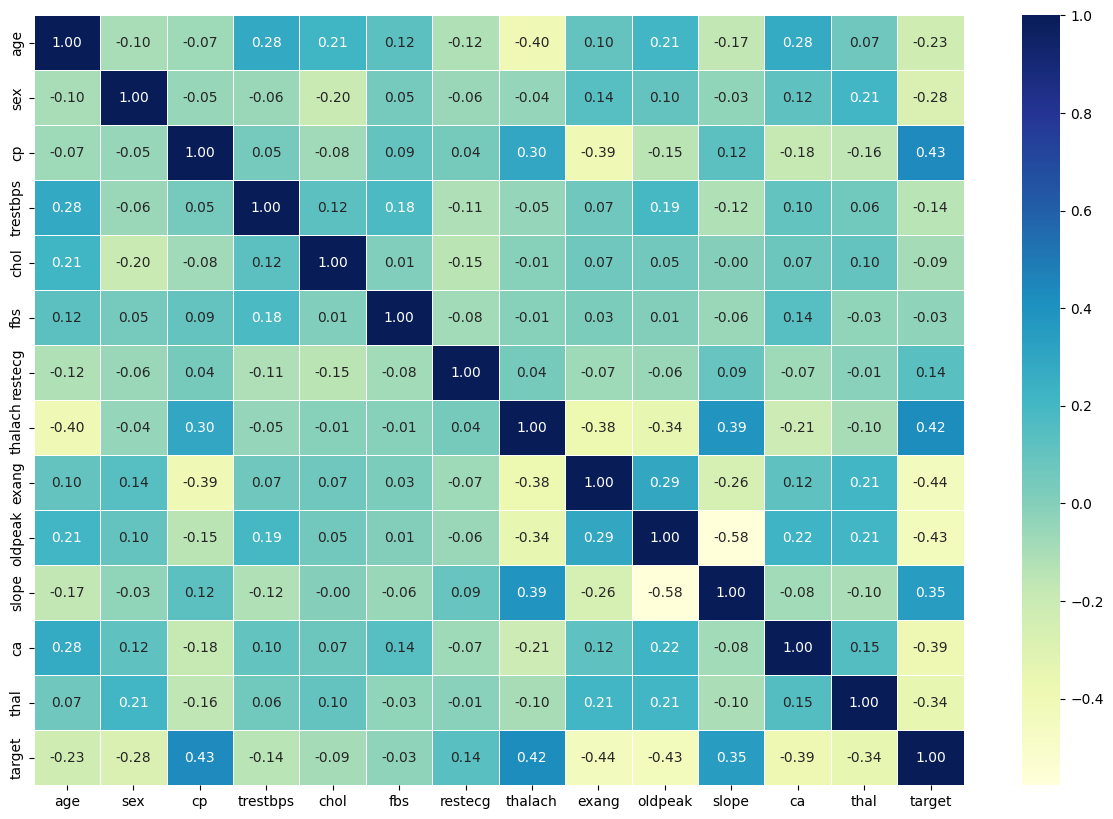

In [16]:
# Let's make our correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize= (15,10))
ax = sns.heatmap(corr_matrix,
                 annot= True,
                 linewidths=0.5,
                 fmt='.2f',
                 cmap= 'YlGnBu')

## 5. Modelling


In [17]:
# Split data into x and y
x= df.drop('target',axis=1)
y= df.target
np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

Now we've got our data split into training and test sets, it's time to build a machine learning model.
We'll train it (find the patterns) on the trianing  set.

And we'll test it (use the patterns) on the test set.

We're going to try 3 different machine learning models:
1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [18]:
# Put models in a dictionary
models= {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Create a function to fit and score models
def fit_and_score(models, x_train, x_test, y_train, y_test):
  """
  Fits and evaluates given machine learning models.
  models: a dict of different Scikit-Learn machine learnign models
  x_train : Training data (no labels)
  x_test
  y_train
  y_test
  """
  # Set random seed
  np.random.seed(42)

  # Make a dict to keep model scores
  model_scores = {}

  # Loop through the model
  for name, model in models.items():
    # Fit the model to the data
     model.fit(x_train, y_train)
     # Evaluate the model and append its score to model_scores
     model_scores[name]= model.score(x_test, y_test)
  return model_scores

In [19]:
model_scores= fit_and_score(models, x_train, x_test, y_train, y_test)
model_scores

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

**Data Modeling**

<Axes: >

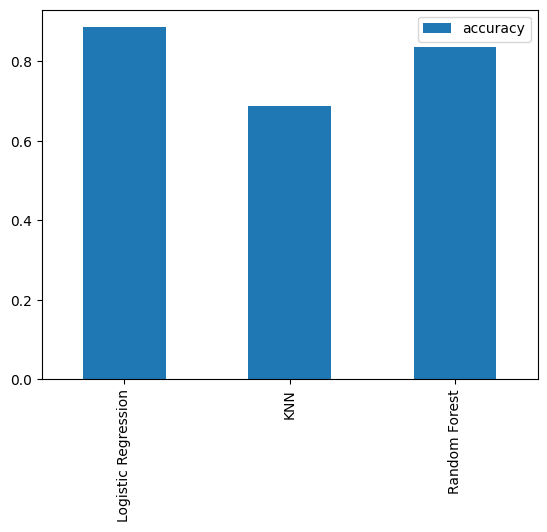

In [20]:
model_compare = pd.DataFrame (model_scores, index= ['accuracy'])
model_compare.T.plot.bar()

Now we've got a baseline model... and we know a model's first prediction aren't always what we should based our next steps off. What we should based our next steps off. What should do ?

Let's look at the following:


* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross=validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)




## Hyperparameter Tunning

In [21]:
# Let's tune KNN

train_scores =[]
test_scores = []

# Create a list of different values for n_neighbours
# neighbours = range(1, 21, 3)

# Setup KNN instance
knn = KNeighborsClassifier()

#Loop through different n_neighbors
for i in range(1, 17):
  knn.set_params(n_neighbors= i)

  # Fit the algorithm
  knn.fit(x_train, y_train)

  # Update the training scores list
  train_scores.append(knn.score(x_train, y_train))

  # Update the test score list
  test_scores.append(knn.score(x_test, y_test))


In [22]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644]

In [23]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361]

Maximum test score on the test data75.41%


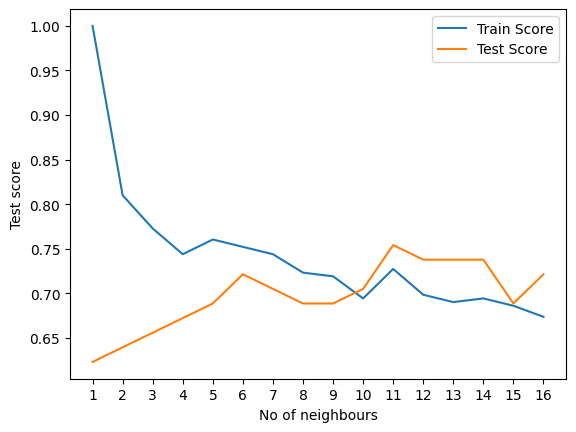

In [24]:
plt.plot(range(1,17), train_scores , label = "Train score")
plt.plot(range(1,17), test_scores, label = 'Test score')
plt.xlabel('No of neighbours')
plt.ylabel('Test score')
plt.legend(['Train Score', 'Test Score'])
plt.xticks(range(1,17))
print(f"Maximum test score on the test data{max(test_scores)*100:.2f}%")

## Hyperparameter tuning with Randomized search CV
We're giing to tune:
* Losgistic regression()
* RandomForestClassifier()

...using RandomizedsearchCV

In [25]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = { "C": np.logspace(-4, 4, 20),
                'solver': ['liblinear']}
# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {'n_estimators': np.arange(10,500,50),
           "max_depth": [None, 3, 5, 10],
           'min_samples_split': np.arange(2,20,2),
           'min_samples_leaf': np.arange(1,20,2)}

Now we've got hyperparameter grids setup for each of our models, let's tune them usning RandomizedSearchCV...

In [26]:
# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperaprameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter = 20,
                                verbose = True)
# Fit random hyperparameter search model for Logistic Regression
rs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [27]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': np.float64(0.23357214690901212)}

In [28]:
rs_log_reg.score(x_test, y_test)

0.8852459016393442

Now we've tuend LogisiticRegression(), let's do the same for RandomForestClassifier()

In [29]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForest Calssifier
rs_rf = RandomizedSearchCV( RandomForestClassifier(),
                           param_distributions=rf_grid,
                            cv=5,
                            n_iter=20,
                            verbose =True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460])},
                   verbose=True)

In [30]:
# Find the best parameters
rs_rf.best_params_

{'n_estimators': np.int64(60),
 'min_samples_split': np.int64(6),
 'min_samples_leaf': np.int64(11),
 'max_depth': 10}

In [31]:
# Evaluate the randomized search RandomForestClassifier model
rs_rf.score(x_test, y_test)

0.8524590163934426

## Hyperparameter Tuning with GridSearchCV

Since our LogisticRegression model provides the best scores so far, we'll try and improve them again using GridSearchCV.

In [32]:
# Different hyperparameters for our LogisticRegression model
log_reg_grid = {'C': np.logspace(-4,4,30),
                'solver':['liblinear']}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid= log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(x_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [33]:
# Check the best hyperparameter
gs_log_reg .best_params_

{'C': np.float64(0.20433597178569418), 'solver': 'liblinear'}

In [34]:
# Evaluating the logisticRegression with GridSearchCV
gs_log_reg.score(x_test, y_test)

0.8852459016393442

## Evaluating our tuned machnine learning classifier beyond accuracy

* Roc curve and AUC score
* Confuin matrix
* Classification report
* precisis
* Recall
* F1-c score
... and it would be great cross-validation was used hweere possible.
To make comparisons and evaluate our trained model, first we need to make predictions.

In [35]:
# Make prediction with tuned model
y_preds = gs_log_reg.predict(x_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [36]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [37]:
# Calculate the bitwise XOR of y_preds and y_test
xor_result = np.bitwise_xor(y_preds, y_test)

# Display the result
np.array((xor_result))

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

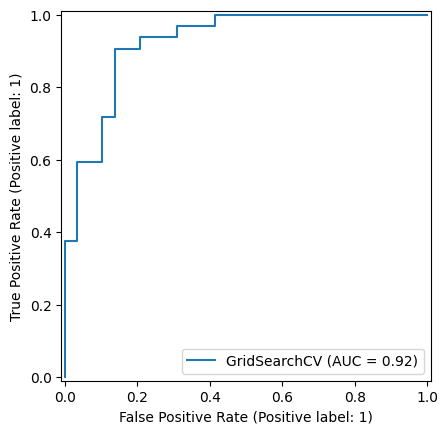

In [38]:
# Plot ROC curve and calculate and calculate AUC metrix
RocCurveDisplay.from_estimator(gs_log_reg, x_test, y_test)

In [39]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


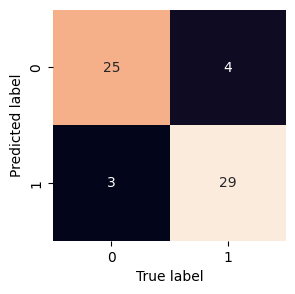

In [40]:
# sns.set(font_size = 1.5)

def plot_conf_mat(y_test, y_preds):
  # plots a nice looking confusion matrix using seaborn's heatmap()
  fig, ax = plt.subplots(figsize= (3,3))
  ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                   annot =True,
                   cbar= False)
  plt.xlabel ("True label")
  plt.ylabel ("Predicted label")
plot_conf_mat(y_test,y_preds)

Now we've got a ROC curve an AUC metric and a confusion matrix, let's get a classification report as well as cross-validated precision recall and f1 score.

In [41]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evalutaion metrics using cross-validation

We're going to calculate  precision, recall and f1-score of our model using cross-validation and to do so we'll be using 'cross_val_score'

In [42]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': np.float64(0.20433597178569418), 'solver': 'liblinear'}

In [43]:
# Create a new classifier with best parameters
clf = LogisticRegression (C= 0.20433597178569418,
                          solver = 'liblinear')


In [44]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf, x, y, cv=5, scoring = 'accuracy')

cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [45]:
cv_acc.mean()

np.float64(0.8446994535519124)

In [46]:
# Cross-validated precision
cv_precision = cross_val_score (clf, x, y, cv=5, scoring='precision')

cv_precision= np.mean(cv_precision)
cv_precision

np.float64(0.8207936507936507)

In [47]:
# Cross-validated recall
cv_recall = cross_val_score(clf, x,y, cv=5,scoring = 'recall')

cv_recall = np.mean(cv_recall)
cv_recall

np.float64(0.9212121212121213)

In [48]:
# Cross-validated f1-score
cv_f1_score= cross_val_score(clf, x, y, cv=5, scoring ='f1')

cv_f1_score= np.mean(cv_f1_score)
cv_f1_score

np.float64(0.8673007976269721)

In [49]:
# visualise cross-validated metrics
cv_metrics = pd.DataFrame ({'Accuracy': cv_acc,
                            'Precision': cv_precision,
                            'Recall':cv_recall,
                            'f1_score':cv_f1_score})
cv_metrics

,Accuracy,Precision,Recall,f1_score
0,0.819672,0.820794,0.921212,0.867301
1,0.901639,0.820794,0.921212,0.867301
2,0.868852,0.820794,0.921212,0.867301
3,0.883333,0.820794,0.921212,0.867301
4,0.750000,0.820794,0.921212,0.867301


<Axes: title={'center': 'Cross-validated classification metrics'}>

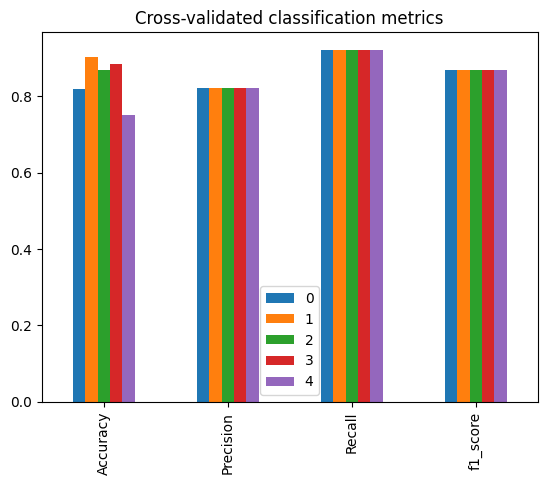

In [50]:
cv_metrics.T.plot.bar(title= 'Cross-validated classification metrics',
                      legend = True)

### Feature Importance

Feature importance is another way of asking,
"Which features contributed most to the outcomes of the model and how did they contribute?"

Finding the feature importance for each model is different .

Let's find the feature importance for our Logisitc Regression model...

In [51]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [52]:
# Fit an instance of LogisitcReggression
gs_log_reg.best_params_

clf = LogisticRegression(C=0.20433597178569418,
                         solver= 'liblinear')
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

0.8852459016393442

In [53]:
# Check coef_
clf.coef_

array([[ 0.00320769, -0.86062049,  0.66001432, -0.01155971, -0.00166496,
         0.04017236,  0.31603405,  0.02458922, -0.60470171, -0.56795456,
         0.45085392, -0.63733328, -0.67555094]])

In [60]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': np.float64(0.0032076883508599633),
 'sex': np.float64(-0.8606204883695241),
 'cp': np.float64(0.660014324982524),
 'trestbps': np.float64(-0.01155970600550047),
 'chol': np.float64(-0.0016649614843449207),
 'fbs': np.float64(0.040172360271308105),
 'restecg': np.float64(0.31603405294617176),
 'thalach': np.float64(0.02458922341328129),
 'exang': np.float64(-0.604701713592625),
 'oldpeak': np.float64(-0.5679545646616215),
 'slope': np.float64(0.4508539209693025),
 'ca': np.float64(-0.6373332766360461),
 'thal': np.float64(-0.6755509369619848)}

<Axes: title={'center': 'Feature importance'}>

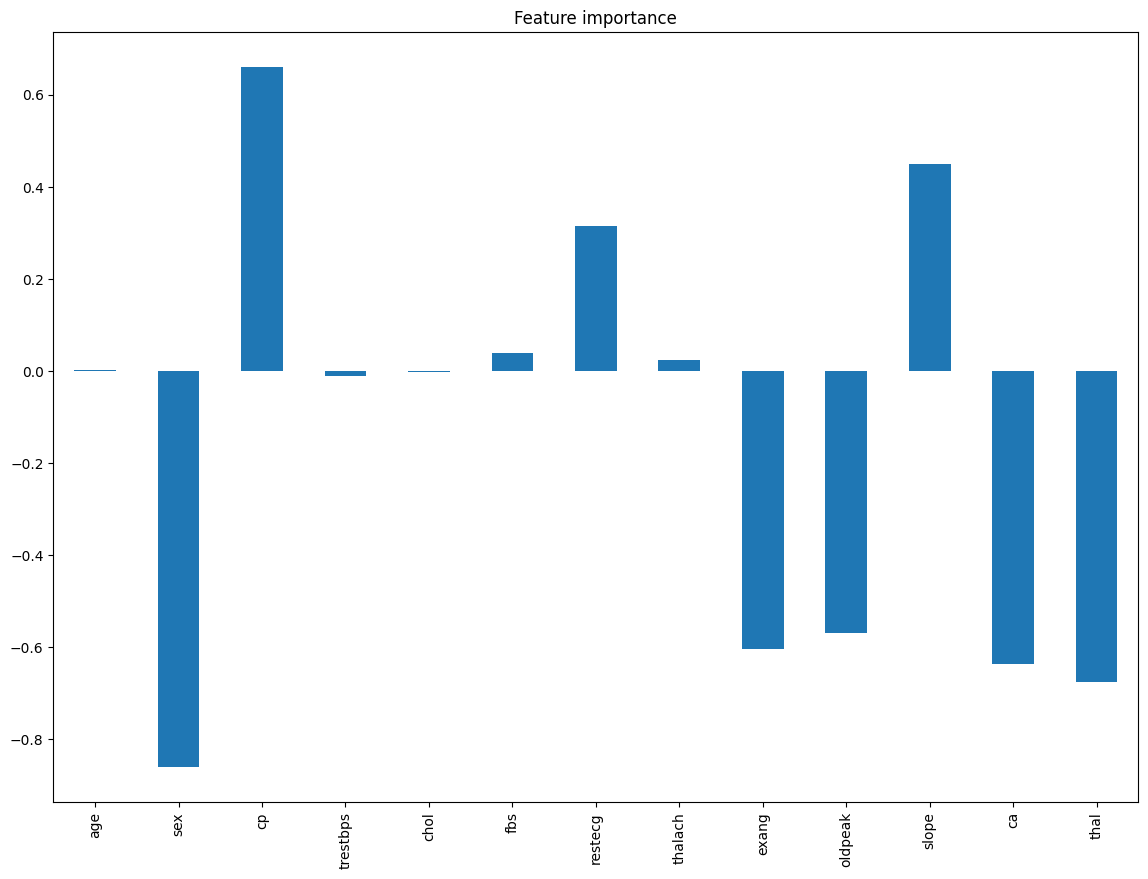

In [64]:
# Visualize feature importance
feature_df = pd.DataFrame (feature_dict, index=[0])
feature_df.T.plot.bar(title='Feature importance', legend= False, figsize=(14,10))

## 6. Experiment
If you haven't hit your evaluation metric yet... ask yourself ..
* Could you collect more data
* Could you try a better model? Like CatBoost or XGBoost?
* Could you improve the current models? (beyond what we've done so far)
